In [ ]:
# Reading from congress_network_data.json
import json
with open('tasks_dependencies.json') as f:
  dependencies = json.load(f)
dependencies

{'Task_0': [],
 'Task_1': [],
 'Task_2': [],
 'Task_3': [],
 'Task_4': ['Task_1', 'Task_0', 'Task_3'],
 'Task_5': ['Task_2', 'Task_4'],
 'Task_6': [],
 'Task_7': [],
 'Task_8': ['Task_6'],
 'Task_9': ['Task_2', 'Task_4', 'Task_0', 'Task_5', 'Task_8'],
 'Task_10': ['Task_3', 'Task_9'],
 'Task_11': [],
 'Task_12': ['Task_1'],
 'Task_13': ['Task_1', 'Task_11', 'Task_4', 'Task_12'],
 'Task_14': ['Task_2', 'Task_1', 'Task_8'],
 'Task_15': [],
 'Task_16': ['Task_10', 'Task_13', 'Task_4', 'Task_8'],
 'Task_17': ['Task_1'],
 'Task_18': ['Task_5'],
 'Task_19': ['Task_12', 'Task_10', 'Task_11'],
 'Task_20': ['Task_6', 'Task_10', 'Task_19', 'Task_8'],
 'Task_21': ['Task_1', 'Task_4', 'Task_12'],
 'Task_22': [],
 'Task_23': ['Task_22', 'Task_10', 'Task_5'],
 'Task_24': ['Task_1', 'Task_18', 'Task_23', 'Task_12'],
 'Task_25': ['Task_20'],
 'Task_26': ['Task_19', 'Task_14', 'Task_25'],
 'Task_27': ['Task_18', 'Task_4', 'Task_24'],
 'Task_28': [],
 'Task_29': ['Task_5'],
 'Task_30': ['Task_5', 'Task_

In [ ]:
#Reading each task and making dependency graph
n = len(dependencies)
print(n)

200


In [ ]:
print(dependencies['Task_' + str(55)])

['Task_27', 'Task_28', 'Task_31', 'Task_49', 'Task_35']


# Constructing the graph from task_dependencies.json file.
Note: Question (d) mentions to find topological orders, so i will need to again find the reverse graph later. As for question (b), creating the graph according to original json file given in task_dependencies.json

In [ ]:
# Coverting original graph to adj_mat
original_adj_list = [[] for i in range(n)]

#Looping through all the key value in dictionary
for key, value in dependencies.items():
  dependent_task = int(key.split('_')[-1])
  for task in value:
    required_task = int(task.split('_')[-1])
    original_adj_list[dependent_task].append(required_task)

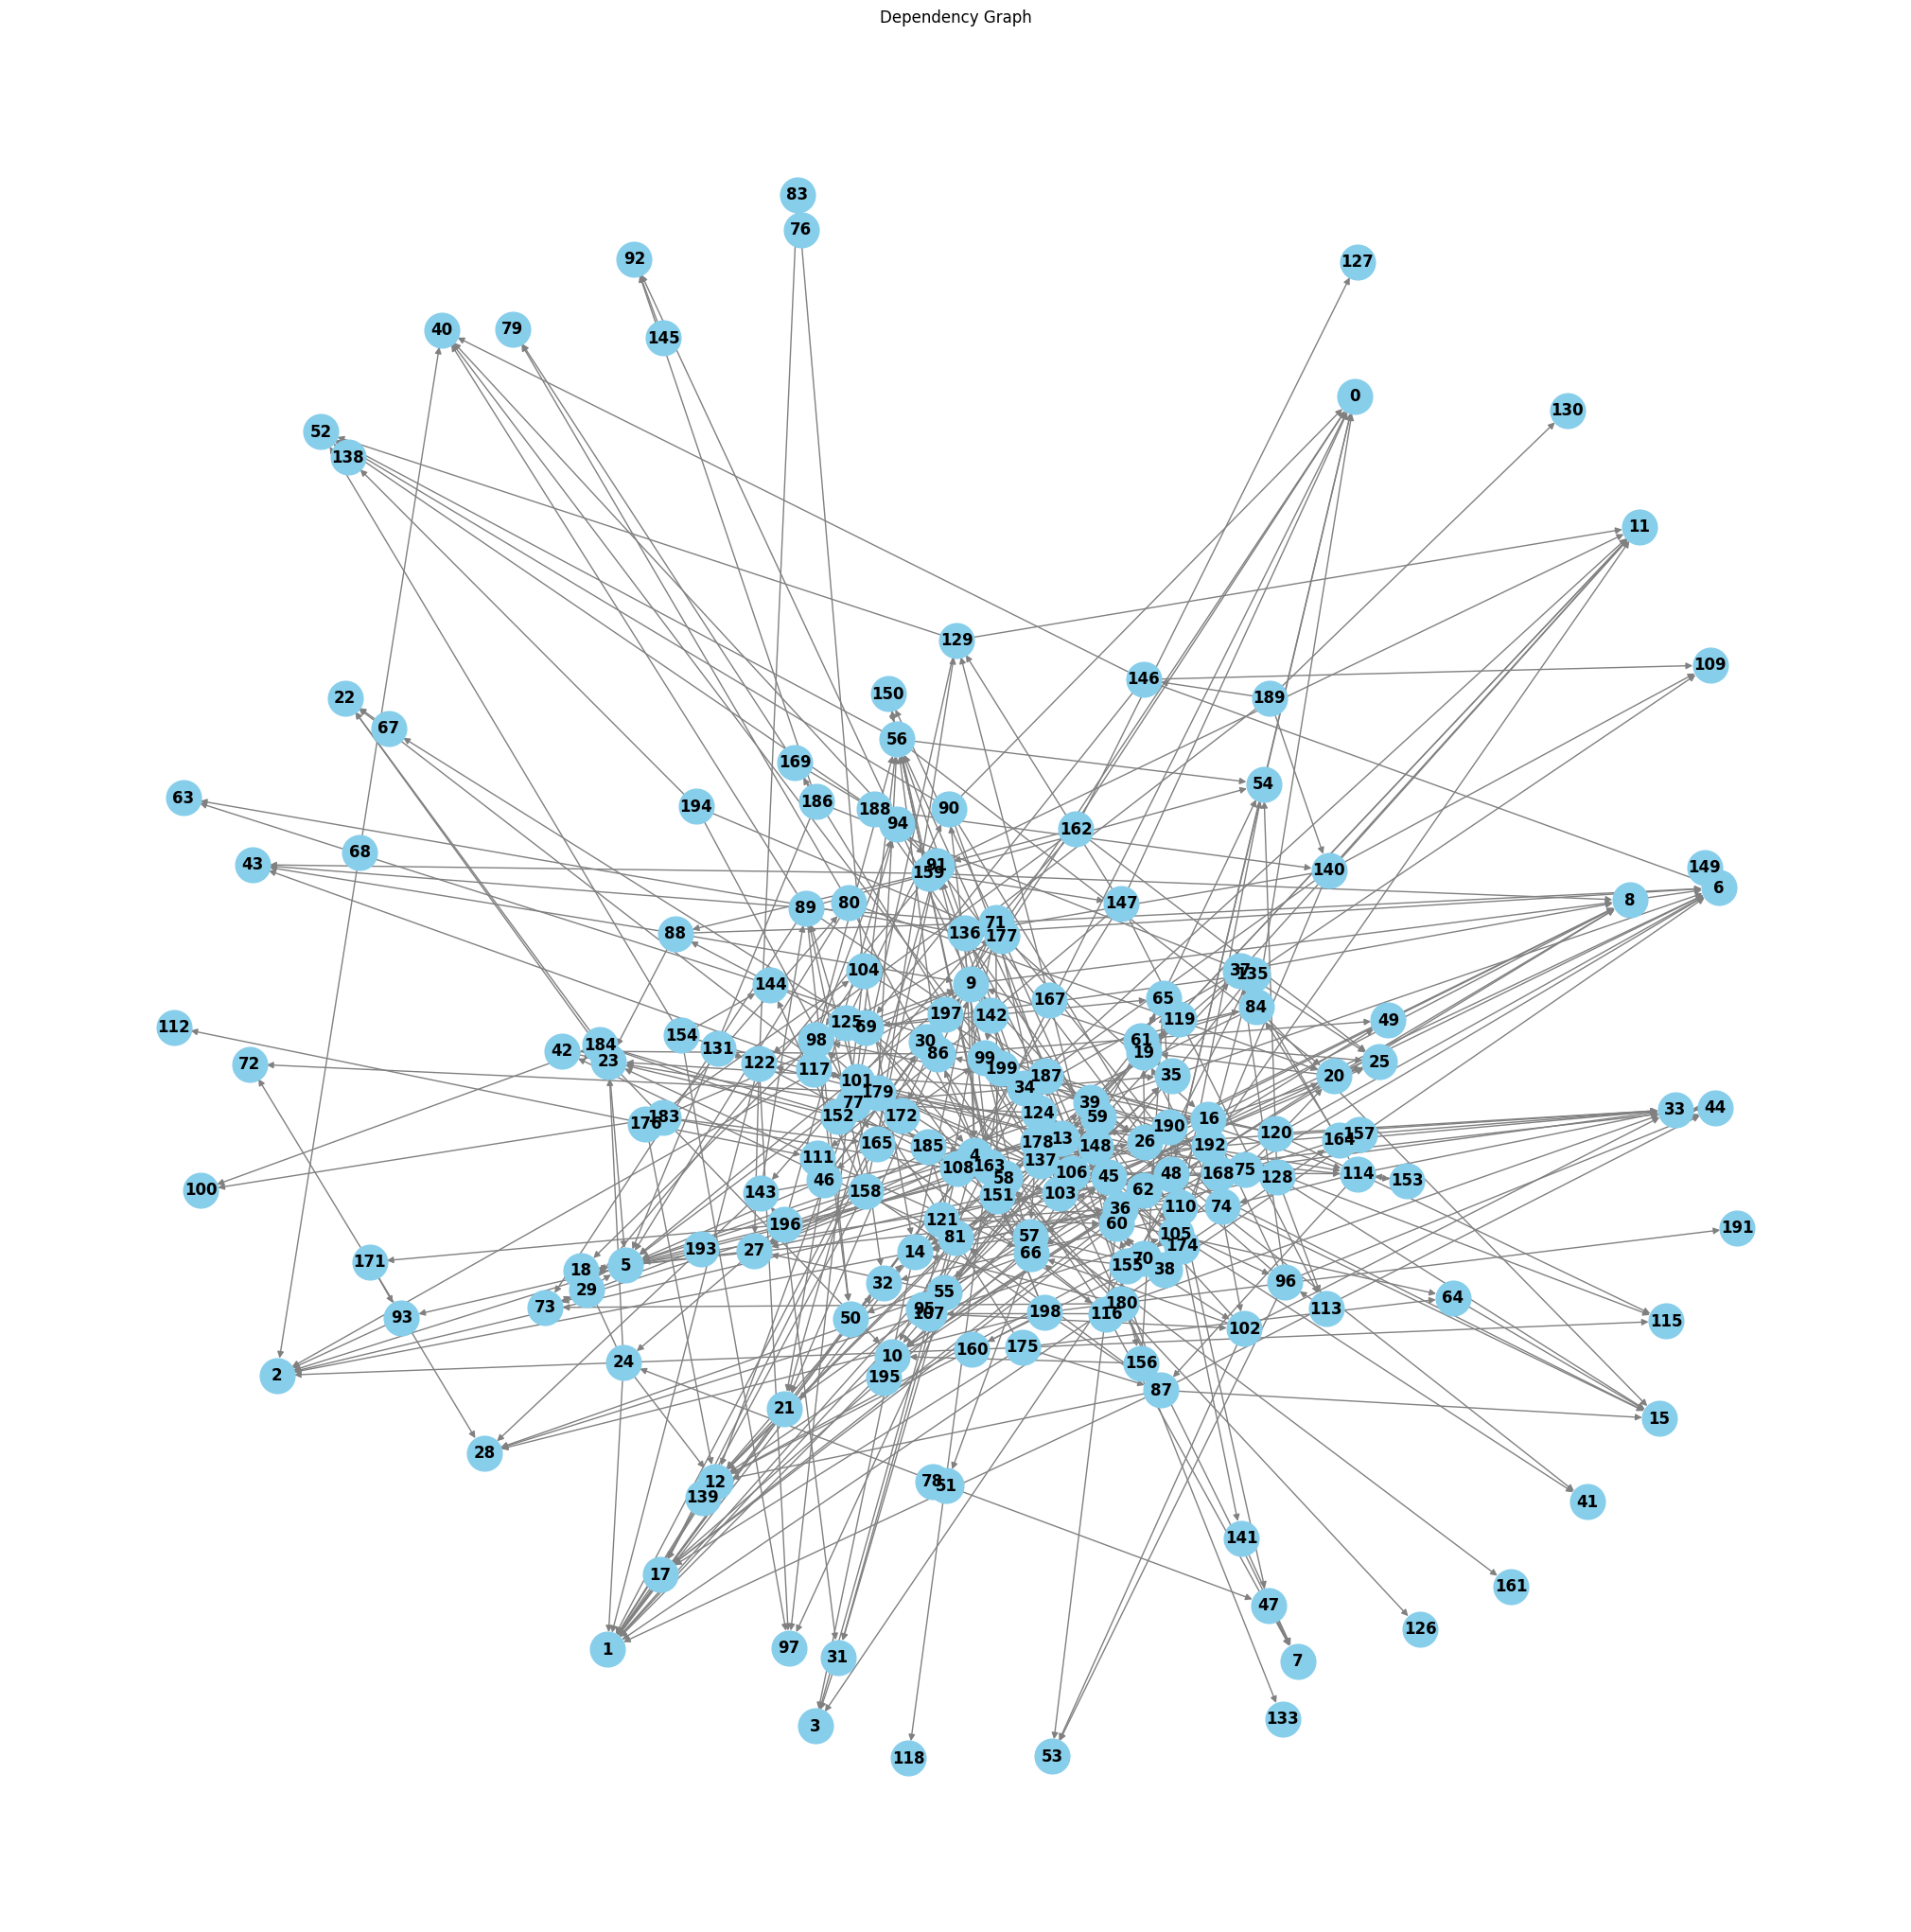

In [ ]:
# Plotting the graph with networkx
import matplotlib.pyplot as plt
import networkx as nx

# Takes input of adjacency list graph representation and convert to nx graph
def convert_to_nx_graph(Graph):
  nx_graph = nx.DiGraph()
  no_of_nodes = len(Graph)
  for node_u, outgoing_edges in enumerate(Graph):
    for node_v in outgoing_edges:
        nx_graph.add_edge(node_u, node_v)
  return nx_graph

# Function to plot the Graph with networkx
def visualize_graph(Graph):
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, with_labels=True, arrows=True, node_size=700, node_color="skyblue", font_size=12, font_weight='bold', edge_color='gray')
    plt.title("Dependency Graph")
    plt.show()


nx_graph = convert_to_nx_graph(original_adj_list)  #Converting adj list to nx graph
visualize_graph(nx_graph)                #Plotting the graph


## Task 1b) Create a function to find the order of tasks that must be completed before the given task (X).

In [ ]:
# Function to get all the task that must be completed before
vis = [False] * (n)
def get_dependencies(node, dependency_graph, required_tasks):       # required_tasks is a list that contain order of all the tasks that must be completed before, along with task X at the end of the list.
  for adj_node in dependency_graph[node]:
    if not vis[adj_node]:
      vis[adj_node] = True
      get_dependencies(adj_node, dependency_graph, required_tasks)
  required_tasks.append(node)

# Assuming the given task X
X = 21
required_tasks = []
get_dependencies(X, original_adj_list, required_tasks)
print(required_tasks)
print(f'Therefore to complete task {X}, we need to complete Tasks {required_tasks[:-1]} before')

[1, 0, 3, 4, 12, 21]
Therefore to complete task 21, we need to complete Tasks [1, 0, 3, 4, 12] before


## Finding the reverse adj list graph required for topolgical sort

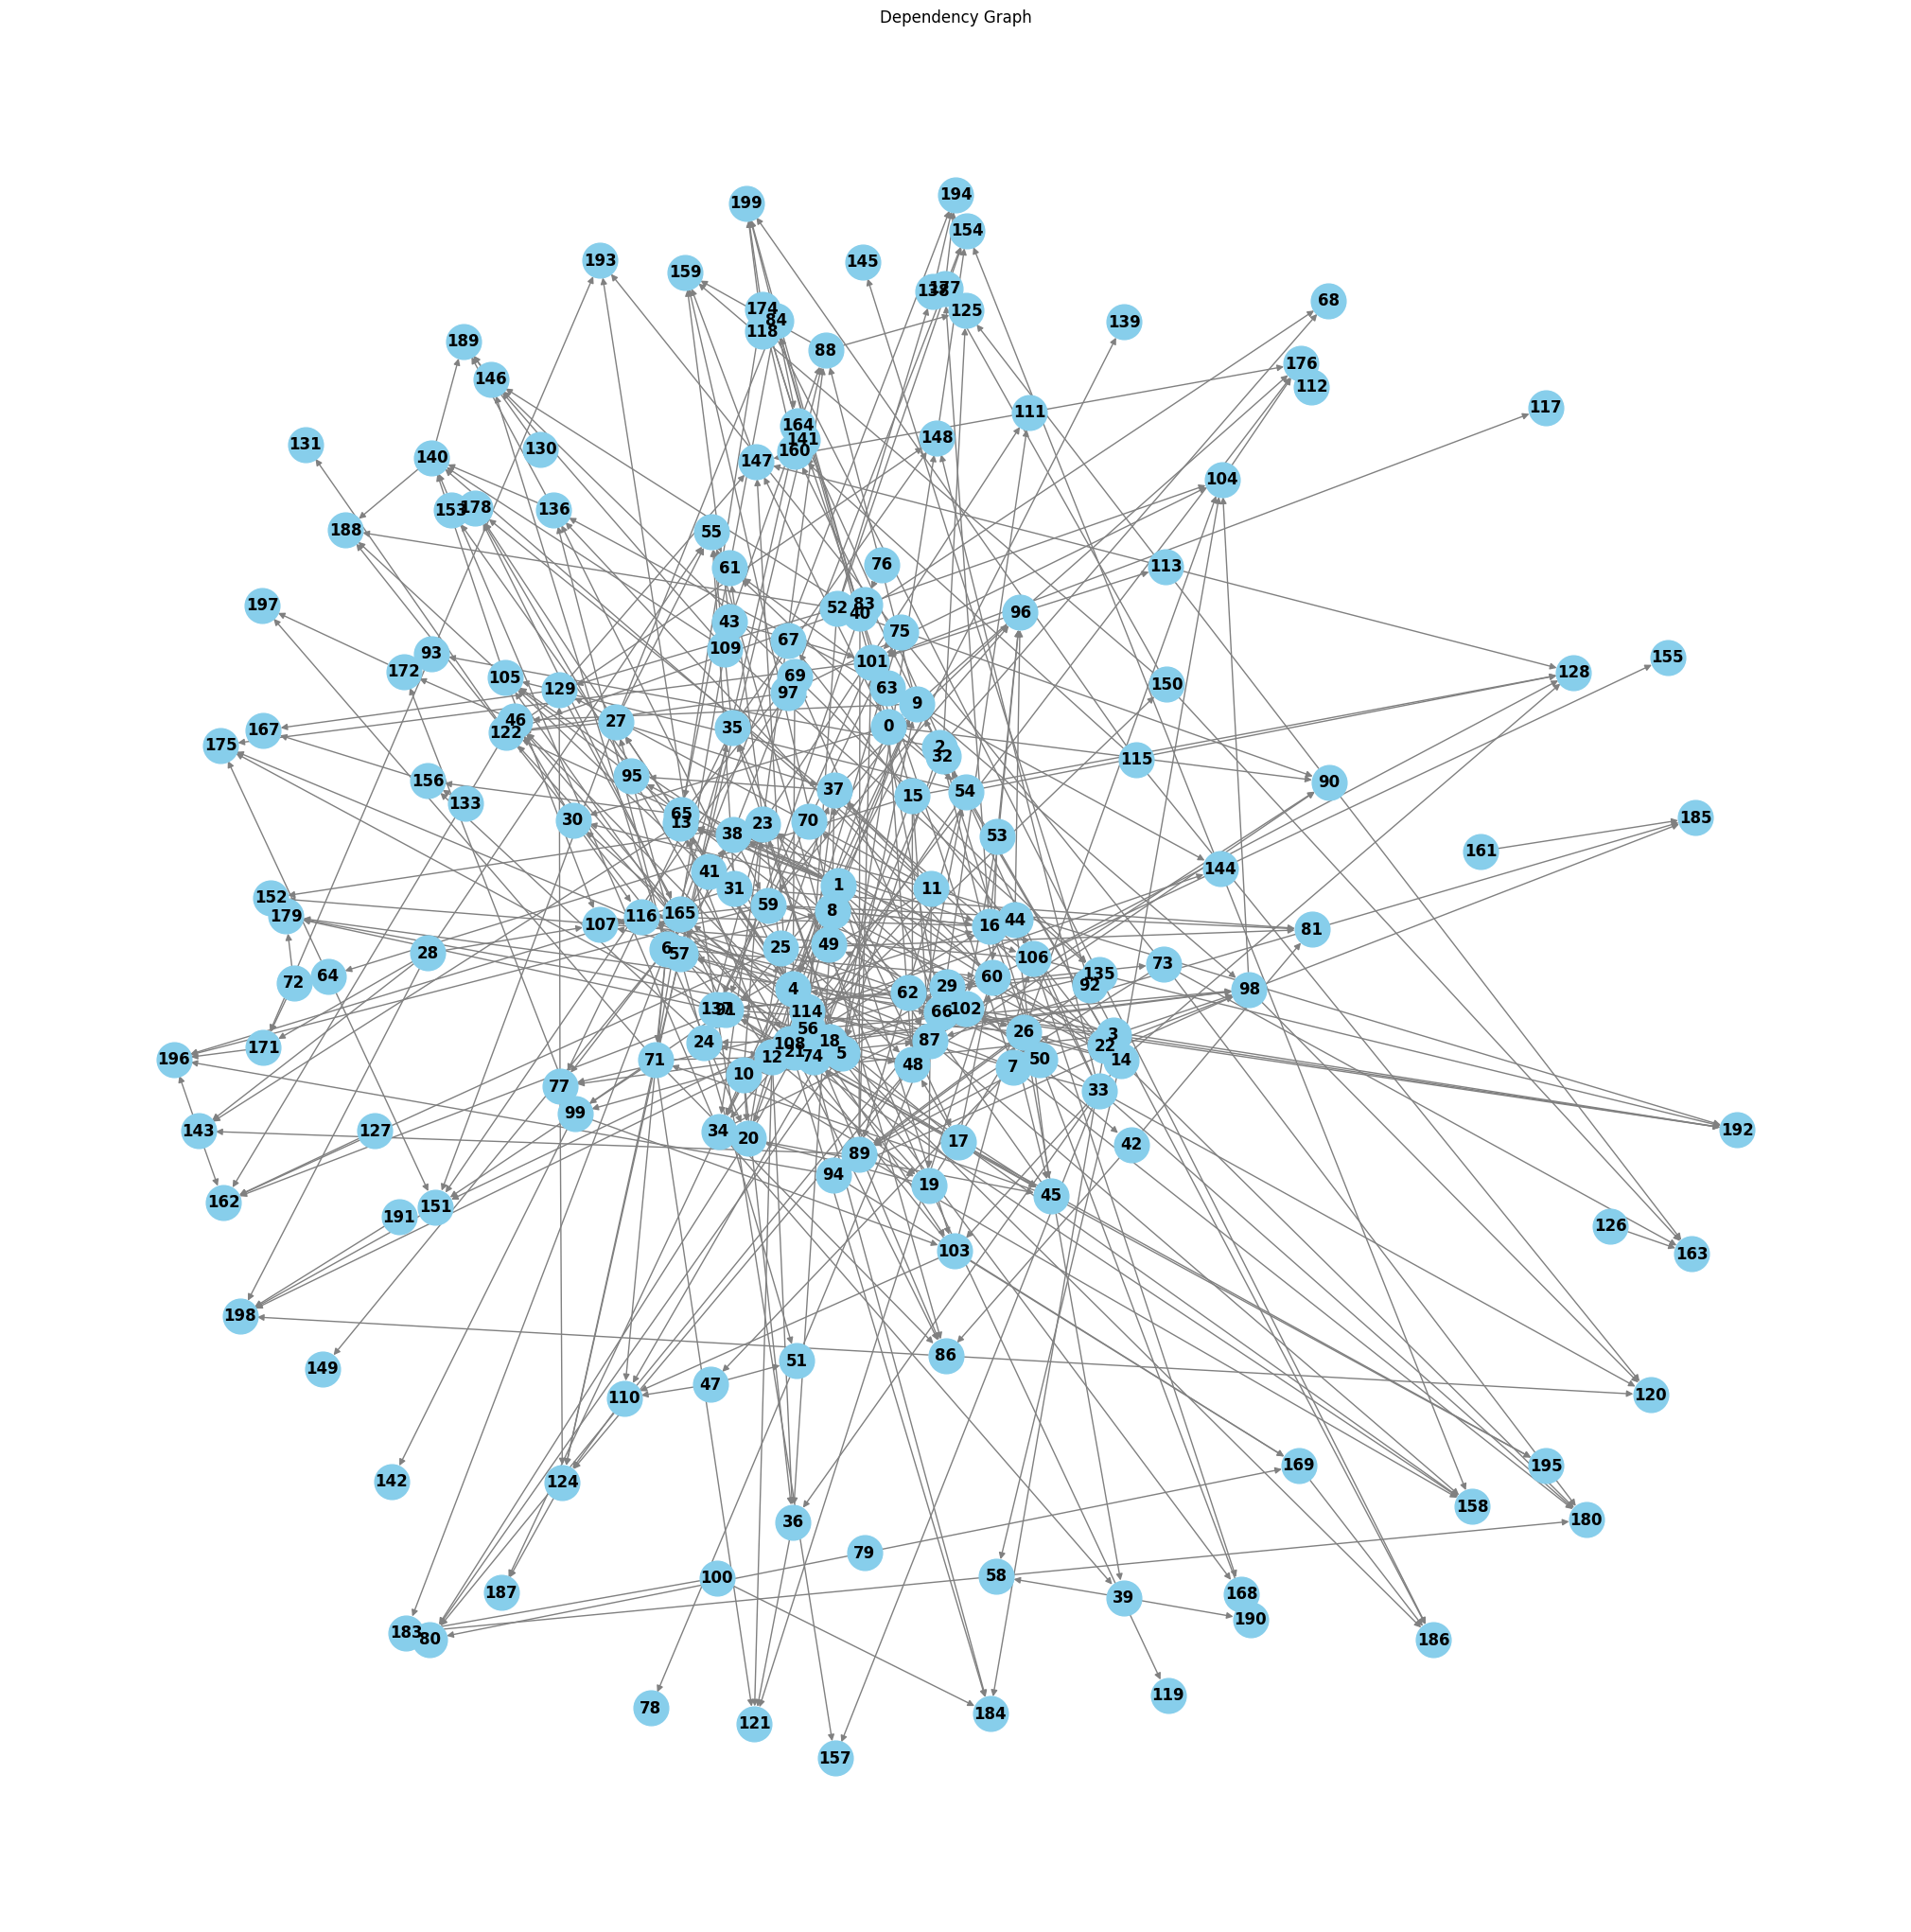

In [ ]:
#Creating a adjacency list for the given dependencies
reverse_adj_list = [[] for i in range(n)]

#Looping through all the key value in dictionary
for key, value in dependencies.items():
  dependent_task = int(key.split('_')[-1])
  for task in value:
    required_task = int(task.split('_')[-1])
    reverse_adj_list[required_task].append(dependent_task)


# Plotting the reversed dependency graph
nx_graph = convert_to_nx_graph(reverse_adj_list)  #Converting adj list to nx graph
visualize_graph(nx_graph)                         #Plotting the graph

In [ ]:
# Task 2c) Finding all the strongly connected graphs
class StronglyConnectedComponent:
    def __init__(self, graph):
        self.graph = graph
        self.nodes_completion_order = []       # Completion order stores nodes according to finishing time of dfs traversal
        self.nodes_count = len(graph)
        self.visited = None
        self.reversed_graph = []               # reversed_graph stores reverse of the graph
        self.components = []                   # components store all the strongly connected components in the graph

    # Function to get all the strongly connected components
    def get_all_components(self):
        self.store_completion_order()
        self.reverse_graph()
        self.find_components()
        return self.components

    # Function to store completion order of nodes
    def store_completion_order(self):
        visited = [False] * self.nodes_count
        for node in range(self.nodes_count):
            if not visited[node]:
                self._store_completion_order_helper(node, self.nodes_completion_order, visited)

    # Function to reverse the graph
    def reverse_graph(self):
        self.reversed_graph = [[] for i in range(self.nodes_count)]
        for node in range(self.nodes_count):
            for adj_node in self.graph[node]:
                self.reversed_graph[adj_node].append(node)

    # Function to get all components in graph
    def find_components(self):
        component = []
        visited = [False] * self.nodes_count
        for node in reversed(self.nodes_completion_order):
            if not visited[node]:
                component = []
                self._find_components_helper(node, component, visited)
                self.components.append(component)

    # Performs dfs to get all nodes according to completion order
    def _store_completion_order_helper(self, node, completion_order, visited):
        visited[node] = True
        for adj_node in self.graph[node]:
            if not visited[adj_node]:
                self._store_completion_order_helper(adj_node, completion_order, visited)
        self.nodes_completion_order.append(node)

    # Performs dfs to get all nodes in a component
    def _find_components_helper(self, node, component, visited):
        visited[node] = True
        component.append(node)
        for adj_node in self.reversed_graph[node]:
            if not visited[adj_node]:
                self._find_components_helper(adj_node, component, visited)

    def get_components_count(self):
        return len(self.components)



## 1c) Printing all strongly connected graphs

In [ ]:
# Printing all strongly connected graphs
scc = StronglyConnectedComponent(reverse_adj_list)
components = scc.get_all_components()
print("The strongly connected components are:")
for component in components:
    print(component)
print(f"Number of strongly connected graphs are: {scc.get_components_count()}")

The strongly connected components are:
[191]
[182]
[181]
[173]
[170]
[166]
[161]
[134]
[133]
[132]
[130]
[127]
[126]
[123]
[118]
[115]
[112]
[109]
[100]
[97]
[92]
[145]
[85]
[82]
[79]
[76]
[83]
[72]
[63]
[53]
[52]
[138]
[43]
[41]
[40]
[33]
[44]
[28]
[22]
[67]
[15]
[64]
[11]
[7]
[141]
[47]
[6]
[149]
[8]
[3]
[31]
[2]
[160]
[93]
[171]
[68]
[1]
[139]
[38]
[17]
[14]
[32]
[50]
[12]
[0]
[4]
[57]
[21]
[13]
[5]
[48]
[54]
[30]
[29]
[91]
[73]
[18]
[9]
[46]
[10]
[36]
[23]
[42]
[34]
[24]
[51]
[78]
[27]
[19]
[119]
[35]
[20]
[56]
[150]
[77]
[129]
[60]
[155]
[136]
[70]
[75]
[45]
[195]
[71]
[151]
[121]
[88]
[74]
[62]
[25]
[37]
[95]
[26]
[89]
[143]
[49]
[86]
[198]
[55]
[61]
[84]
[164]
[65]
[156]
[167]
[105]
[140]
[188]
[66]
[111]
[102]
[99]
[172]
[197]
[142]
[103]
[110]
[124]
[187]
[106]
[192]
[152]
[80]
[69]
[146]
[189]
[135]
[174]
[199]
[39]
[58]
[180]
[16]
[59]
[107]
[116]
[165]
[183]
[96]
[113]
[128]
[101]
[137]
[193]
[157]
[117]
[81]
[185]
[87]
[175]
[114]
[179]
[168]
[190]
[153]
[178]
[144]
[158]


# 1 d) Finding all topological sorts

In [ ]:
# Class to implement toposort
class toposort():
    def __init__(self, graph):
        self.graph = graph
        self.nodes_count = len(graph)
        self.indegree = None
        self.topo_orders = []

    def get_all_topological_orders(self, no_of_toposorts=100):    #Set no_of_sorts to None to get all topo sorts, but it may take lot of time
        # Checking if there's a cycle in the graph first
        if self.has_cycle():
            print("Graph has a cycle. Topological sorting not possible.")
            return []

        # Calculating the indegree of all nodes
        self.calculate_indegree()
        topological_order = []
        visi = [False] * self.nodes_count
        no_of_toposorts = [no_of_toposorts]  # List to keep the count mutable
        # Recursively finding all topological orders
        self._get_all_orders_helper(0, topological_order, visi, no_of_toposorts)
        return self.topo_orders

    def calculate_indegree(self):
        # Initializing indegree array to track incoming edges
        self.indegree = [0] * self.nodes_count
        for node in self.graph:
            for adj_node in node:
                self.indegree[adj_node] += 1

    def _get_all_orders_helper(self, count, topological_order, visi, no_of_toposorts):
        # Stopping if we have found the required number of topological orders
        if no_of_toposorts[0] != None and no_of_toposorts[0] == 0:
            return
        # If we have a valid topological ordering, add it to the list
        if count == self.nodes_count:
            self.topo_orders.append(topological_order.copy())  # Storing a copy of the current order
            if no_of_toposorts[0] != None:
                no_of_toposorts[0] -= 1
            return

        # Try every node to see if it can be added to the topological order
        for node in range(self.nodes_count):
            if not visi[node] and self.indegree[node] == 0:
                visi[node] = True
                # Reduce indegree of adjacent nodes
                for adj_node in self.graph[node]:
                    self.indegree[adj_node] -= 1
                topological_order.append(node)
                # Recursively call helper to extend the current topological order
                self._get_all_orders_helper(count + 1, topological_order, visi, no_of_toposorts)
                # Backtracking
                topological_order.pop()
                visi[node] = False
                for adj_node in self.graph[node]:
                    self.indegree[adj_node] += 1

    # Function to check if the graph has a cycle
    def has_cycle(self):
        visited = [False] * self.nodes_count
        rec_stack = [False] * self.nodes_count

        for node in range(self.nodes_count):
            if not visited[node]:
                if self._detect_cycle_dfs(node, visited, rec_stack):
                    return True
        return False

    # Helper function to detect cycle using DFS
    def _detect_cycle_dfs(self, node, visited, rec_stack):
        visited[node] = True
        rec_stack[node] = True

        # Visiting all adjacent nodes
        for adj_node in self.graph[node]:
            if not visited[adj_node]:
                if self._detect_cycle_dfs(adj_node, visited, rec_stack):
                    return True
            elif rec_stack[adj_node]:
                # A back edge exists, so a cycle is found
                return True

        # Backtracking to remove the node from the recursion stack
        rec_stack[node] = False
        return False


In [ ]:
# Pringting all topo_sorts
topo = toposort(reverse_adj_list)
topo_orders = topo.get_all_topological_orders(100)
print("Topological orders are")
for order in topo_orders:
    print(order)

Topological orders are
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,

In [ ]:
print(f"No of topo sort orders: {len(topo_orders)}")

No of topo sort orders: 100


# Question 2) Twitter Interaction Network for the US Congress:

## 2a) Creating a directed unweighted graph from the given data

In [ ]:
# Reading from congress_network_data.json
import json
with open('congress_network/congress_network_data.json') as f:
  congress_net = json.load(f)
type(congress_net)
congress_net_adj_list = congress_net[0]['outList']

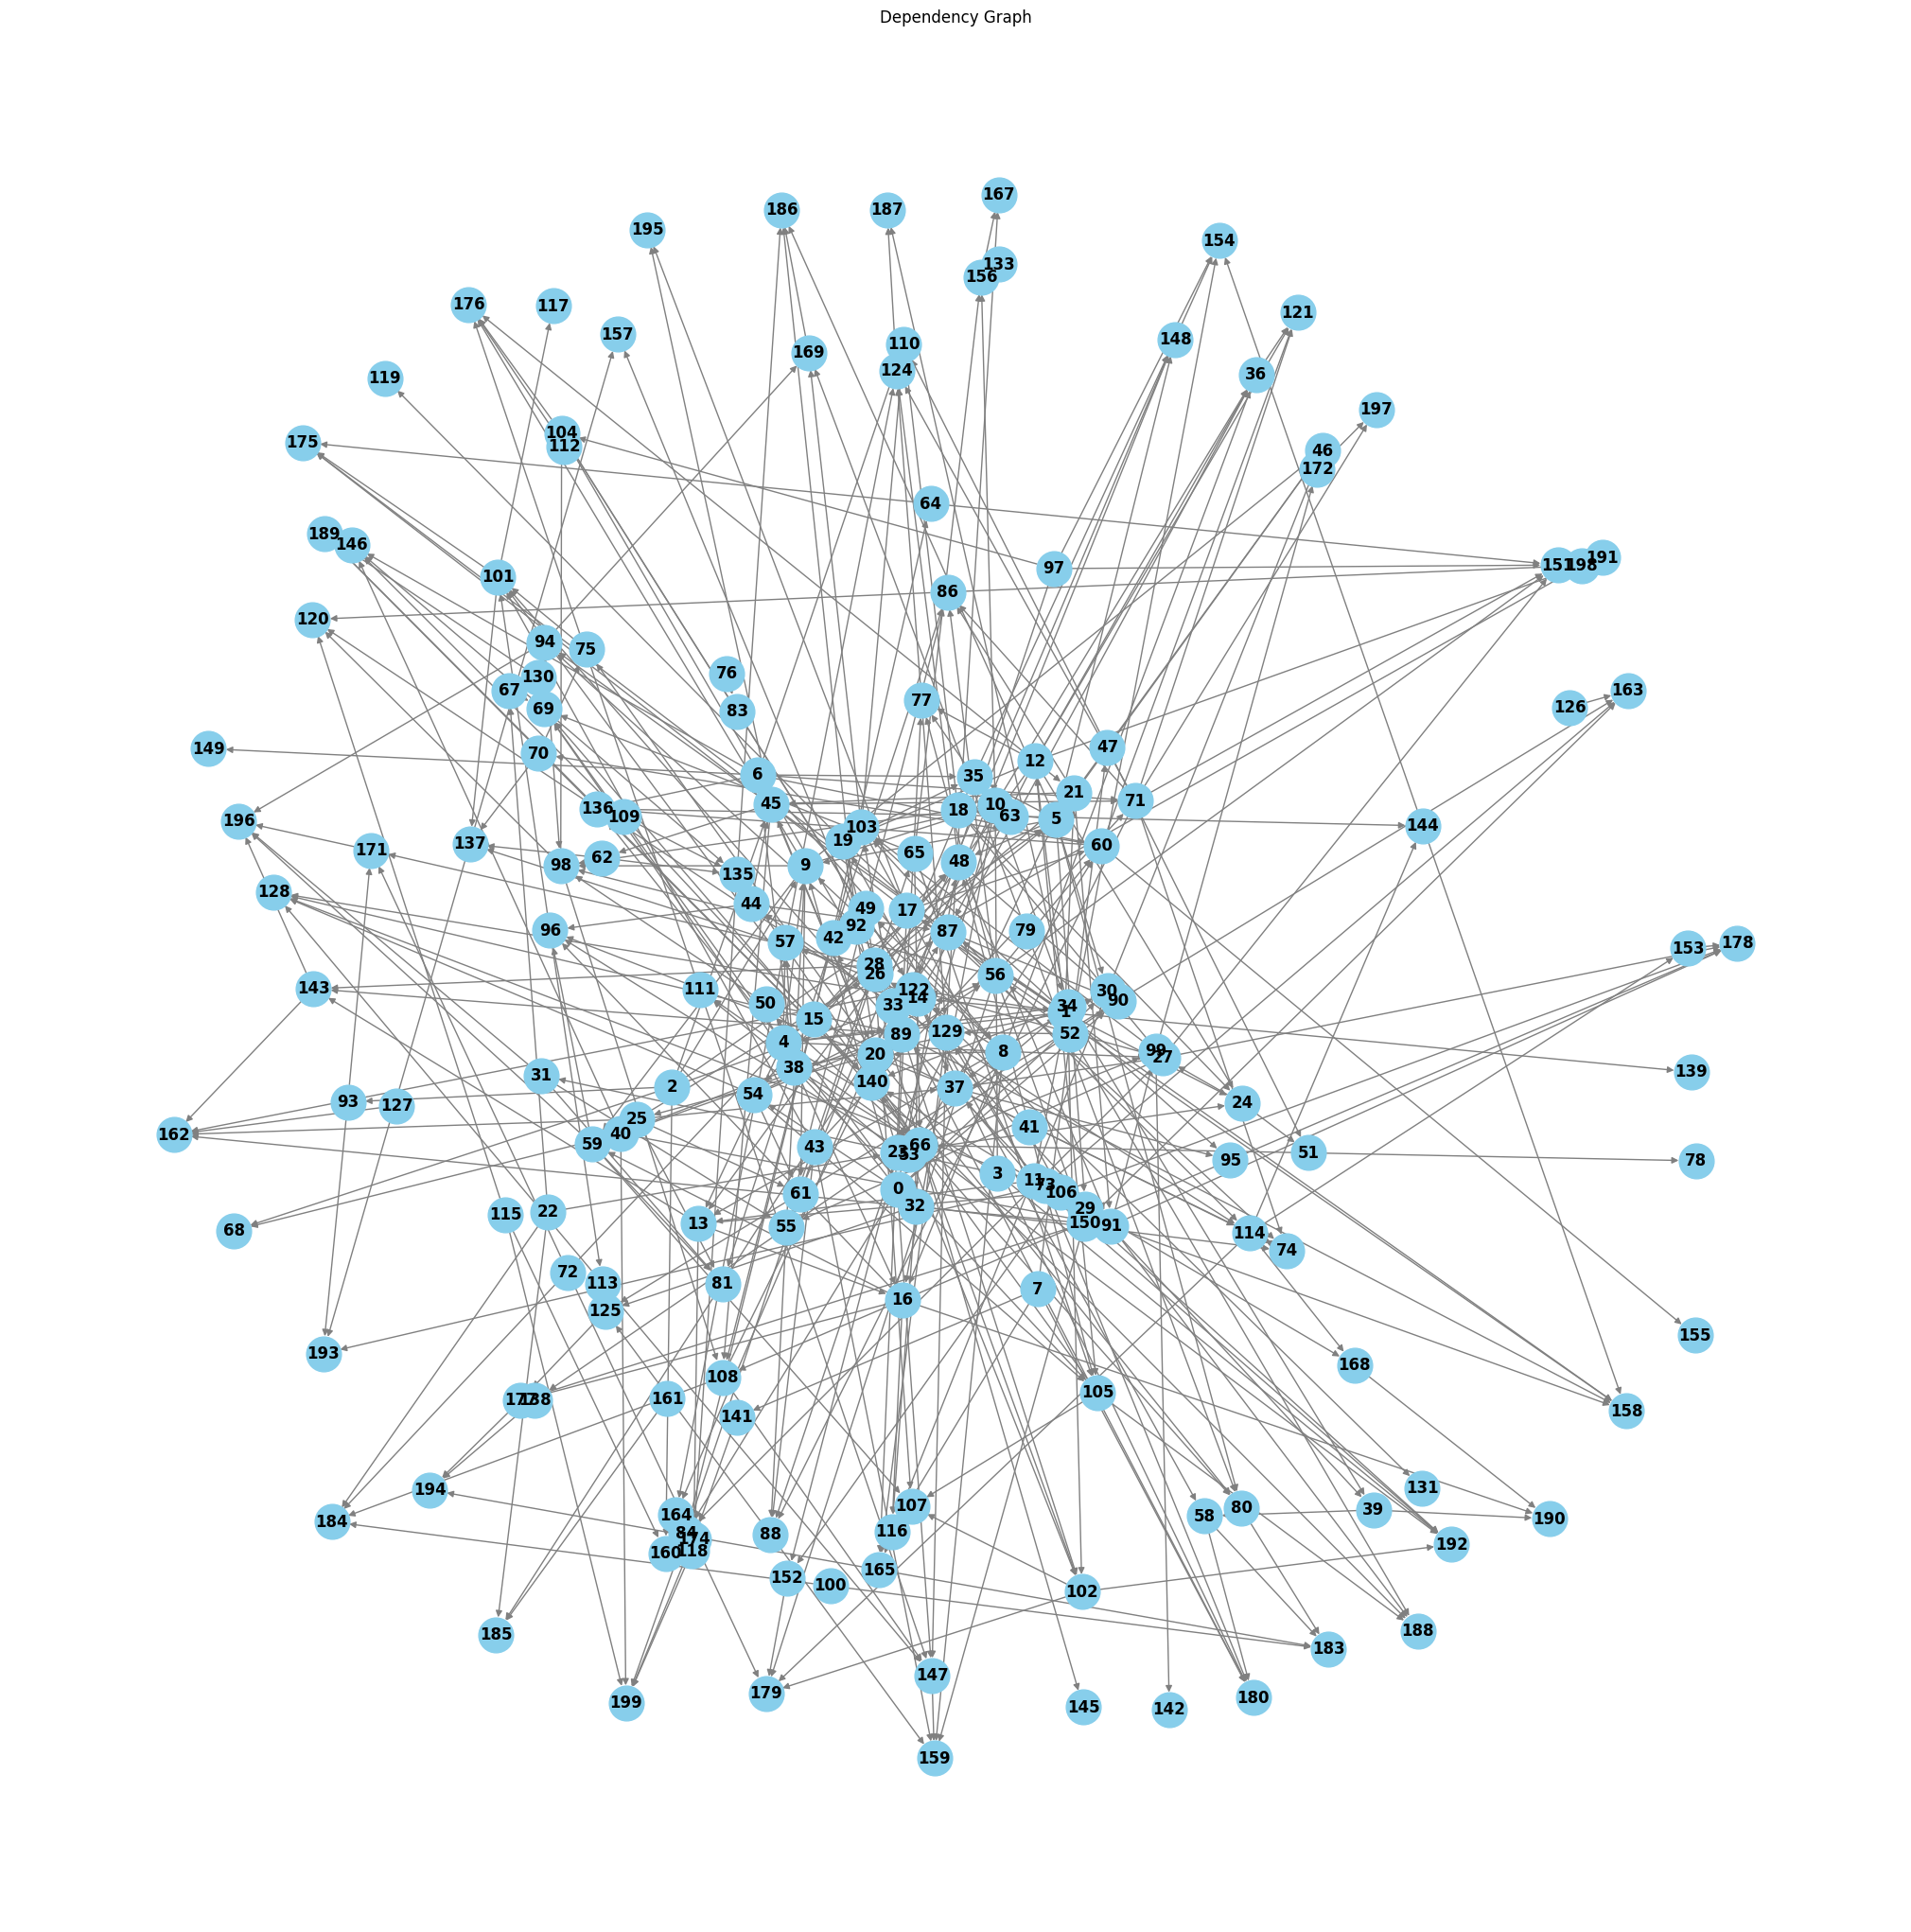

In [ ]:
nx_graph_congress = convert_to_nx_graph(congress_net_adj_list)  #Converting adj list to nx graph
visualize_graph(nx_graph_congress)                              #Plotting the graph

# 2b) Finding Strongly connected graphs

In [ ]:
# Printing all strongly connected graphs
scc_congress = StronglyConnectedComponent(congress_net_adj_list)
components_congress = scc_congress.get_all_components()
print("The strongly connected components are:")
for component in components_congress:
    print(component)
print(scc_congress.get_components_count())

The strongly connected components are:
[456]
[434]
[356]
[240]
[227]
[31]
[0, 4, 3, 8, 6, 29, 51, 1, 11, 7, 13, 12, 14, 9, 2, 18, 17, 15, 20, 16, 27, 10, 50, 35, 5, 42, 36, 24, 25, 26, 23, 19, 49, 67, 73, 21, 22, 32, 30, 45, 33, 52, 43, 75, 57, 65, 71, 37, 59, 53, 48, 56, 47, 39, 38, 40, 28, 46, 54, 58, 60, 61, 55, 68, 63, 64, 66, 69, 70, 87, 72, 34, 41, 113, 95, 104, 127, 92, 81, 74, 44, 269, 98, 129, 102, 100, 136, 76, 148, 117, 85, 77, 80, 266, 137, 101, 105, 97, 175, 120, 322, 93, 162, 88, 84, 90, 119, 94, 110, 146, 151, 106, 203, 188, 83, 192, 99, 118, 116, 62, 198, 112, 140, 109, 96, 134, 124, 323, 160, 86, 143, 107, 108, 298, 149, 114, 164, 159, 161, 125, 141, 209, 190, 89, 168, 169, 202, 253, 103, 91, 131, 178, 184, 258, 259, 254, 121, 154, 135, 122, 147, 111, 115, 179, 171, 130, 132, 133, 211, 78, 423, 152, 234, 210, 220, 150, 206, 237, 208, 138, 155, 139, 128, 303, 142, 166, 195, 153, 156, 126, 79, 335, 158, 383, 172, 231, 294, 189, 200, 219, 185, 165, 245, 199, 251, 223, 214

## 2c) Printing topological orders

In [ ]:
# Printing all topo sorts
topo_congress = toposort(congress_net_adj_list)
topos = topo_congress.get_all_topological_orders()

Graph has a cycle. Topological sorting not possible.
